<a href="https://colab.research.google.com/github/vvilliscool/ML_LIB_Class_Goorm/blob/master/goorm_20220804_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.2 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=b33e47f6a1b7abf163a630a1956a971c9753d27cd20723f9be5218ccb1a6a9cf
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import mglearn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from mglearn.datasets import make_blobs 

### 데이터 만들기
X, y = make_blobs(n_samples=(400, 50), 
                  centers=2, 
                  cluster_std=[7.0, 2],         # 클러스터의 표준 편차
                  random_state=42)

In [7]:
print( X.shape, y.shape )
print(X[0:5], y[0:5])

(450, 2) (450,)
[[ 9.23767508  1.24749256]
 [-2.47249173  9.34315028]
 [-3.61525291  6.02611864]
 [-0.85989572 14.41034249]
 [ 5.80773521  1.2545855 ]] [1 0 0 0 1]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

데이터 시각화

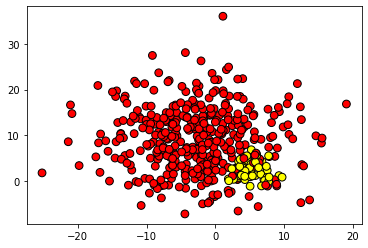

In [9]:
plt.scatter(X[:,0], X[:,1], c=y, 
            cmap=plt.cm.autumn, s=60, edgecolors='k')

임계값에 따른 값을 확인

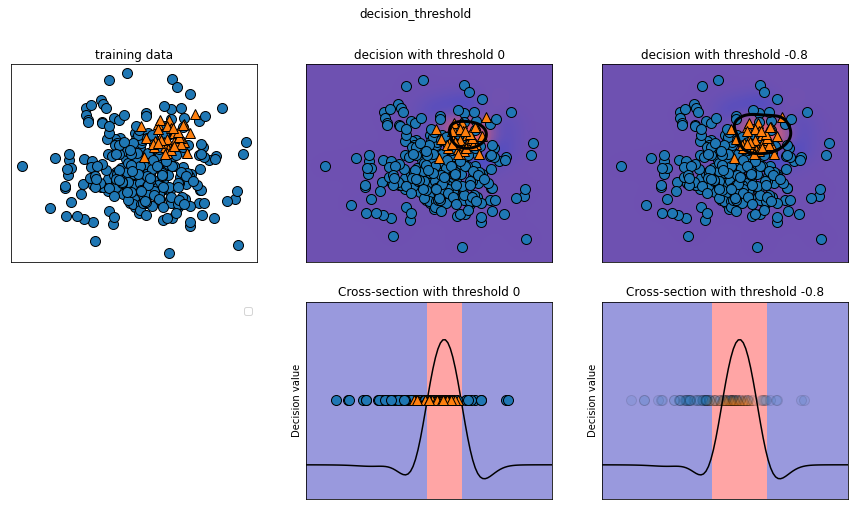

In [10]:
import mglearn
mglearn.plots.plot_decision_threshold()

## 모델(SVC) 예측 후, 평가 지표 확인

In [12]:
svc = SVC(gamma=.05).fit(X_train, y_train)   
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.42      0.83      0.56         6

    accuracy                           0.93       113
   macro avg       0.70      0.88      0.76       113
weighted avg       0.96      0.93      0.94       113



In [13]:
pred = svc.decision_function(X_test)
print(pred[0:10])
np.min(pred), np.max(pred)

[-1.0167542   0.72583536 -1.17766946 -1.00425497 -1.0002495  -0.99977182
 -1.07285711 -1.2206812  -1.24018502 -1.30361098]


(-1.509707253620952, 1.6245457437087478)

In [14]:
decision_0 = svc.decision_function(X_test)   > 0     # 임계값을 0으로 
decision_0

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [15]:
y_pred_0 = svc.decision_function(X_test)   > 0 

print(classification_report(y_test, y_pred_0))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       107
           1       0.42      0.83      0.56         6

    accuracy                           0.93       113
   macro avg       0.70      0.88      0.76       113
weighted avg       0.96      0.93      0.94       113



In [16]:
decision_8 = svc.decision_function(X_test)   > -0.8     # 임계값을 0으로 
decision_8

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False])

In [17]:
y_pred_8 = svc.decision_function(X_test)   > -0.8 

print(classification_report(y_test, y_pred_8))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       107
           1       0.33      1.00      0.50         6

    accuracy                           0.89       113
   macro avg       0.67      0.94      0.72       113
weighted avg       0.96      0.89      0.92       113

